# Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing data

In [2]:
# Turn your project folder path into a string
path = r'/Users/dianafayarbas/Desktop/10.24.2023 Instacart Basket Analysis'

In [3]:
path

'/Users/dianafayarbas/Desktop/10.24.2023 Instacart Basket Analysis'

In [4]:
# Import the latest version of your merged project data set

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_4.8update.pkl'))

# Creating Bar Charts

<Axes: >

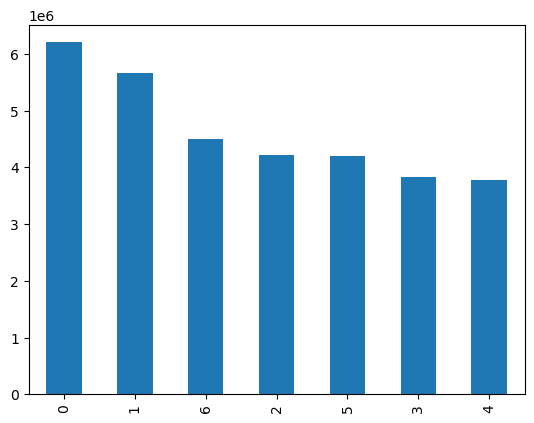

In [7]:
# Create bar chart for your “orders_day_of_week” column
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

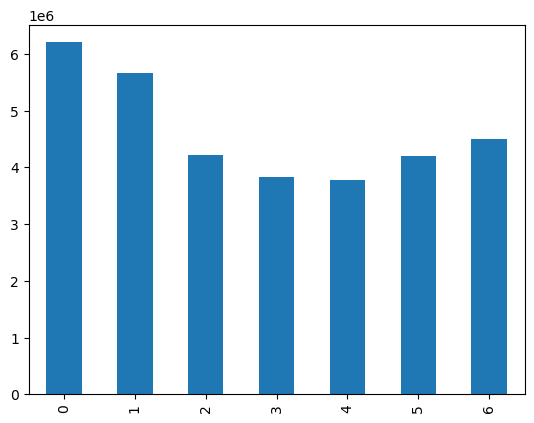

In [8]:
# Sort according to index order
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

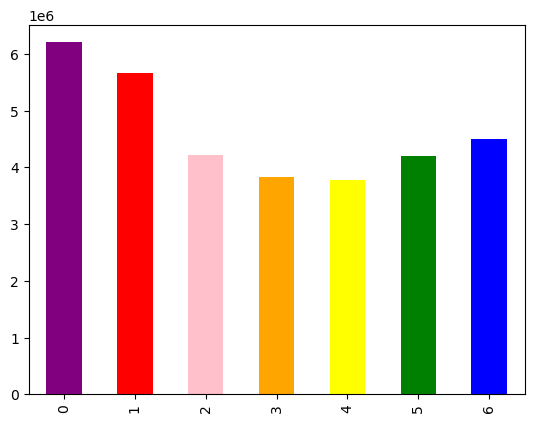

In [9]:
# Change color
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Exporting Charts

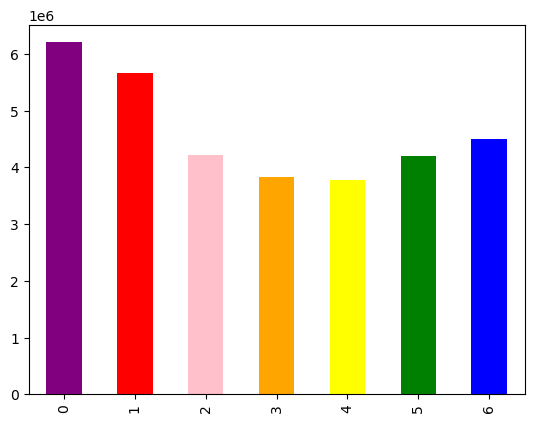

In [10]:
bar.figure

In [12]:
# Export it outside of Jupyter in the form of an image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

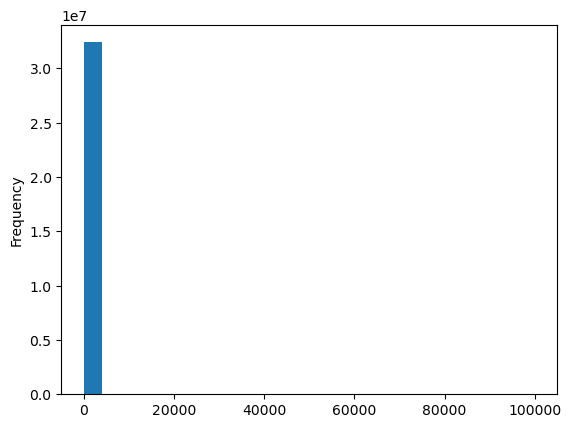

In [13]:
# Create a histogram of the “prices” column
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

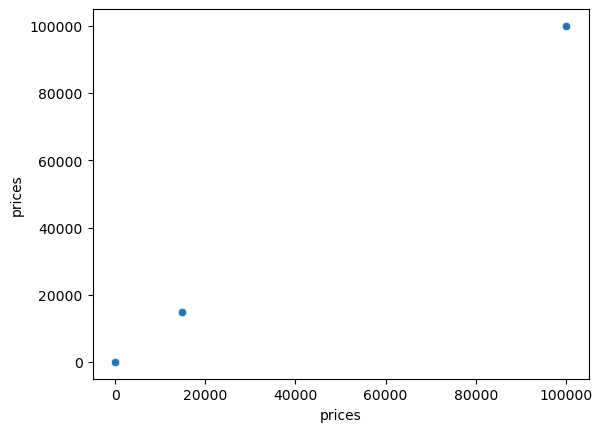

In [14]:
# Create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [15]:
# Determine whether there are any values above a certain threshold in your data, 
# for instance, anything above the “normal” price of a supermarket item
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order,spending_flag,median_dspo,order_freq_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,Regularly busy,High-range product,Regularly busy,Most orders,40,Regular customer,21.006803,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,Regularly busy,High-range product,Regularly busy,Most orders,40,Regular customer,21.006803,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,Regularly busy,High-range product,Regularly busy,Average orders,4,New customer,2.923077,Low spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,Busiest day,High-range product,Busiest days,Average orders,4,New customer,2.923077,Low spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,Regularly busy,High-range product,Busiest days,Average orders,16,Regular customer,8.323741,Low spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,Busiest day,High-range product,Busiest days,Average orders,39,Regular customer,19.681319,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,Busiest day,High-range product,Busiest days,Most orders,39,Regular customer,19.681319,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,Regularly busy,High-range product,Least busy,Most orders,15,Regular customer,7.845133,Low spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,Regularly busy,High-range product,Least busy,Average orders,12,Regular customer,6.567251,Low spender,12.0,Regular customer


In [16]:
# Mark outlier values as missing
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [17]:
# Check whether the replacement was successful by running a max-value check on your “prices” column
ords_prods_merge['prices'].max()

25.0

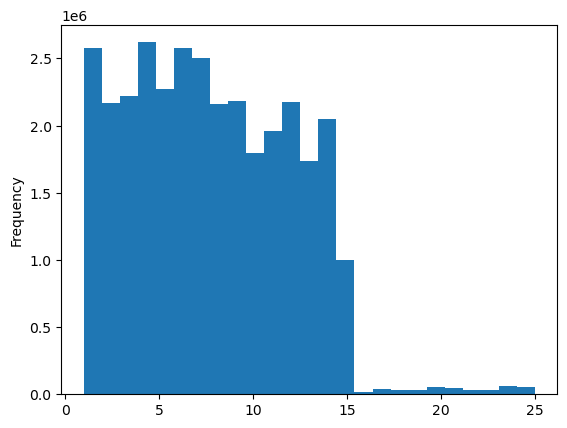

In [18]:
# Retry that histogram of your “prices” column
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

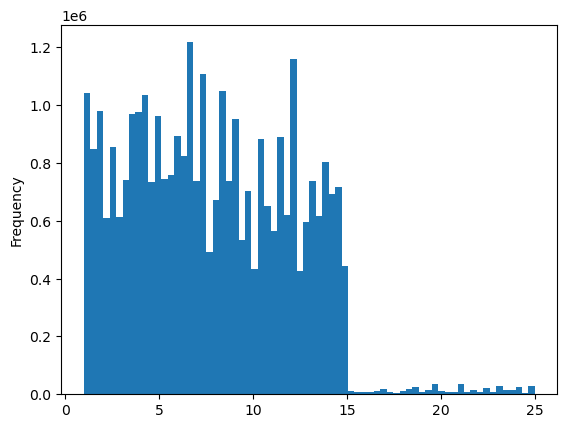

In [19]:
# Increase the level of granularity in the histogram
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [20]:
# Go ahead and export your histogram using the method outlined earlier in this Exercise. 
# Rather than storing and exporting it as a bar object, you may want to consider something
# like hist!
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# Sampling Data

In [21]:
# Create sample
# Set the seed
np.random.seed(4)
# Create a list holding True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [22]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
# Simple example
np.random.rand(10)

array([0.06557465, 0.85698584, 0.24456371, 0.22683171, 0.17068366,
       0.27008946, 0.52534234, 0.83151571, 0.78153402, 0.0164016 ])

In [27]:
# Split your dataframe into two samples
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [28]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [30]:
# Check rows
len(ords_prods_merge)

32404859

In [31]:
len(big) + len(small)

32404859

In [34]:
# Reduce your samples to only those columns necessary for the chart, 
# namely “prices” and “orders_day_of_week.”
df_2 = small[['orders_day_of_week','prices']]

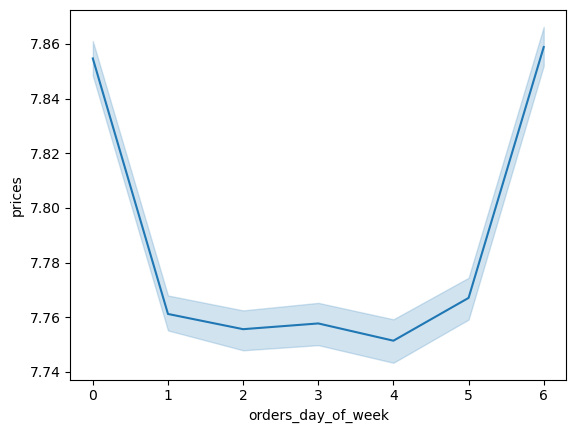

In [35]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')